In [3]:
#les imports 
import numpy as np
import pandas as pd
#from pyspark.mllib.stat import Statistics 
from math import sqrt 
from pprint import pprint
from numpy import array
import os
import os.path as osp
import pickle

In [4]:
df = pd.read_excel("videos.xlsx")

In [5]:
#comptage des valeurs
print('comptage des valeurs  ValueToPredict : ')
print('-------------------------------------- ')

print(df['ValueToPredict'].value_counts())

comptage des valeurs  ValueToPredict : 
-------------------------------------- 
0      43659
25       603
50       327
33       204
66       199
40       103
20        97
60        77
75        55
100       52
Name: ValueToPredict, dtype: int64


In [6]:
# Filtre les classes minoritaire
c20=df[df.ValueToPredict == 20 ]   # 97
#c25=df[df.ValueToPredict == 25 ]   # 603
c50=df[df.ValueToPredict == 50 ]   # 327
c33=df[df.ValueToPredict == 33 ]   # 204
c66=df[df.ValueToPredict == 66 ]   # 199
c40=df[df.ValueToPredict == 40 ]   # 103
c60=df[df.ValueToPredict == 60 ]   # 77
c75=df[df.ValueToPredict == 75]    # 55
c100=df[df.ValueToPredict == 100]  # 52

In [7]:
# Préparation des classes Minoritaire
c20 = pd.concat([c20,c20,c20,c20,c20,c20], ignore_index=True)     # Classe 20 duppliquer en 6 fois 97 * 6 = 582
c60 = pd.concat([c60,c60,c60,c60,c60,c60,c60], ignore_index=True) # Classe 60 duppliquer en 7 fois 77 * 7 = 539
c75 = pd.concat([c75,c75,c75,c75,c75,c75,c75,c75,c75,c75], ignore_index=True) # Classe 75 duppliquer en 10 fois 55 * 10 =550
c100 = pd.concat([c100,c100,c100,c100,c100,c100,c100,c100,c100,c100], ignore_index=True) # Classe 100 duppliquer en 10 fois 52 * 10 = 520
c50 = pd.concat([c50,c50], ignore_index=True)  # Classe 50 duppliquer en 2 fois 327 * 2 = 654
c33 = pd.concat([c33,c33,c33], ignore_index=True)   # Classe 33 duppliquer en 3 fois 204 * 3 = 612
c66 = pd.concat([c66,c66,c66], ignore_index=True)   # Classe 66 duppliquer en 3 fois 199 * 3 = 597
c40 = pd.concat([c40,c40,c40,c40,c40,c40], ignore_index=True)   # Classe 40 duppliquer en 6 fois 103 * 6 = 618


In [8]:
print c20.shape
print c60.shape
print c75.shape
print c100.shape
print c50.shape
print c33.shape
print c66.shape
print c40.shape

(582, 378)
(539, 378)
(550, 378)
(520, 378)
(654, 378)
(612, 378)
(597, 378)
(618, 378)


In [9]:
c_ech = pd.concat([c20,c60,c75,c100,c50,c33,c40,c66], ignore_index=True)  #  (4672, 378)

In [10]:
c_ech.shape

(4672, 378)

In [11]:
df_ech = pd.concat([df, c_ech], ignore_index=True) # (45376 + 4672) = (50048, 378)

In [12]:
df_ech.shape  # Dataset apres sur-échantionnage 

(50048, 378)

In [13]:
df.shape

(45376, 378)

In [14]:
print(df_ech['ValueToPredict'].value_counts())  # statistique de la nouvelle dataset 

0      43659
50       981
33       816
66       796
40       721
20       679
60       616
75       605
25       603
100      572
Name: ValueToPredict, dtype: int64


In [15]:
#df = df.values

In [16]:
df_ech = df_ech.values  # converter en array

In [17]:
import argparse
import numpy as np
import sys
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
sys.path.insert(0, "lib")

from gcforest.gcforest import GCForest
#from gcforest.utils.config_utils import load_json

In [18]:
from gcforest.gcforest import GCForest
from gcforest.utils.config_utils import load_json
# K-Fold = 5   n_estimators = 10
config = load_json("./examples/video510.json")
gc = GCForest(config)

In [52]:
from sklearn.cross_validation import train_test_split
 
X = df_ech[:,0:377]
y = df_ech[:,377]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [53]:
y.shape

(50048,)

In [54]:
X.shape

(50048, 377)

In [55]:
# Nombre de classe - y_train
len(np.unique(y_train)) 

10

In [51]:
# Plot normalized confusion matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

class_names=['0','50','33','66','40','20','60','75','25','100']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

   # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
 # If the model you use cost too much memory for you.
    # You can use these methods to force gcforest not keeping model in memory
    # gc.set_keep_model_in_mem(False), default is TRUE.

#(X_train, y_train), (X_test, y_test) = df.
#X_train, y_train = X_train[:28691], y_train[:28691]
#X_train = X_train[:, np.newaxis,:]
#X_test = X_test[:, np.newaxis,:]

In [25]:
from time import time
t0 = time()

X_train_enc = gc.fit_transform(X_train, y_train)
    # X_enc is the concatenated predict_proba result of each estimators of the last layer of the GCForest model
    # X_enc.shape =
    #   (n_datas, n_estimators * n_classes): If cascade is provided
    #   (n_datas, n_estimators * n_classes, dimX, dimY): If only finegrained part is provided
    # You can also pass X_test, y_test to fit_transform method, then the accracy on test data will be logged when training.
#X_train_enc, X_test_enc = gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test)
    # WARNING: if you set gc.set_keep_model_in_mem(True), you would have to use
    # gc.fit_transform(X_train, y_train, X_test=X_test, y_test=y_test) to evaluate your model.
    

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

[ 2018-02-20 12:14:13,743][cascade_classifier.fit_transform] X_groups_train.shape=[(33532, 377)],y_train.shape=(33532,),X_groups_test.shape=no_test,y_test.shape=no_test
[ 2018-02-20 12:14:13,797][cascade_classifier.fit_transform] group_dims=[377]
[ 2018-02-20 12:14:13,799][cascade_classifier.fit_transform] group_starts=[0]
[ 2018-02-20 12:14:13,801][cascade_classifier.fit_transform] group_ends=[377]
[ 2018-02-20 12:14:13,802][cascade_classifier.fit_transform] X_train.shape=(33532, 377),X_test.shape=(0, 377)
[ 2018-02-20 12:14:13,858][cascade_classifier.fit_transform] [layer=0] look_indexs=[0], X_cur_train.shape=(33532, 377), X_cur_test.shape=(0, 377)
[ 2018-02-20 12:16:12,794][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_0.predict)=86.75%
[ 2018-02-20 12:18:10,783][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5_folds.train_1.predict)=86.54%
[ 2018-02-20 12:20:09,160][kfold_wrapper.log_eval_metrics] Accuracy(layer_0 - estimator_0 - 5

[ 2018-02-20 13:31:39,836][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_3.predict)=86.68%
[ 2018-02-20 13:31:43,806][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_4.predict)=86.77%
[ 2018-02-20 13:31:43,813][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_1 - 5_folds.train_cv.predict)=86.69%
[ 2018-02-20 13:31:45,196][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_0.predict)=86.66%
[ 2018-02-20 13:31:46,451][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_1.predict)=86.75%
[ 2018-02-20 13:31:47,848][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_2.predict)=86.68%
[ 2018-02-20 13:31:49,118][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_3.predict)=86.59%
[ 2018-02-20 13:31:50,480][kfold_wrapper.log_eval_metrics] Accuracy(layer_2 - estimator_2 - 5_folds.train_4.predict)=86.61%
[ 2018-

[ 2018-02-20 14:58:50,106][kfold_wrapper.log_eval_metrics] Accuracy(layer_4 - estimator_3 - 5_folds.train_cv.predict)=87.07%
[ 2018-02-20 14:58:50,111][cascade_classifier.calc_accuracy] Accuracy(layer_4 - train.classifier_average)=86.97%
[ 2018-02-20 14:58:50,186][cascade_classifier.fit_transform] [layer=5] look_indexs=[0], X_cur_train.shape=(33532, 417), X_cur_test.shape=(0, 417)
[ 2018-02-20 15:00:28,269][kfold_wrapper.log_eval_metrics] Accuracy(layer_5 - estimator_0 - 5_folds.train_0.predict)=86.84%
[ 2018-02-20 15:02:04,493][kfold_wrapper.log_eval_metrics] Accuracy(layer_5 - estimator_0 - 5_folds.train_1.predict)=86.90%
[ 2018-02-20 15:03:47,189][kfold_wrapper.log_eval_metrics] Accuracy(layer_5 - estimator_0 - 5_folds.train_2.predict)=86.79%
[ 2018-02-20 15:05:26,670][kfold_wrapper.log_eval_metrics] Accuracy(layer_5 - estimator_0 - 5_folds.train_3.predict)=86.96%
[ 2018-02-20 15:07:03,004][kfold_wrapper.log_eval_metrics] Accuracy(layer_5 - estimator_0 - 5_folds.train_4.predict)=86.

[ 2018-02-20 16:14:43,149][kfold_wrapper.log_eval_metrics] Accuracy(layer_7 - estimator_1 - 5_folds.train_cv.predict)=86.76%
[ 2018-02-20 16:14:44,430][kfold_wrapper.log_eval_metrics] Accuracy(layer_7 - estimator_2 - 5_folds.train_0.predict)=86.78%
[ 2018-02-20 16:14:45,804][kfold_wrapper.log_eval_metrics] Accuracy(layer_7 - estimator_2 - 5_folds.train_1.predict)=86.73%
[ 2018-02-20 16:14:47,197][kfold_wrapper.log_eval_metrics] Accuracy(layer_7 - estimator_2 - 5_folds.train_2.predict)=86.55%
[ 2018-02-20 16:14:48,457][kfold_wrapper.log_eval_metrics] Accuracy(layer_7 - estimator_2 - 5_folds.train_3.predict)=86.74%
[ 2018-02-20 16:14:49,762][kfold_wrapper.log_eval_metrics] Accuracy(layer_7 - estimator_2 - 5_folds.train_4.predict)=86.71%
[ 2018-02-20 16:14:49,771][kfold_wrapper.log_eval_metrics] Accuracy(layer_7 - estimator_2 - 5_folds.train_cv.predict)=86.70%
[ 2018-02-20 16:19:43,374][kfold_wrapper.log_eval_metrics] Accuracy(layer_7 - estimator_3 - 5_folds.train_0.predict)=87.04%
[ 2018

('Compte fait en ', '17922.691', ' seconds')


In [56]:
from time import time
t0 = time()

y_pred = gc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of GcForest = {:.2f} %".format(acc * 100))

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

[ 2018-02-20 18:18:58,755][cascade_classifier.transform] X_groups_test.shape=[(16516, 377)]
[ 2018-02-20 18:18:58,790][cascade_classifier.transform] group_dims=[377]
[ 2018-02-20 18:18:58,791][cascade_classifier.transform] X_test.shape=(16516, 377)
[ 2018-02-20 18:18:58,820][cascade_classifier.transform] [layer=0] look_indexs=[0], X_cur_test.shape=(16516, 377)
[ 2018-02-20 18:19:01,672][cascade_classifier.transform] [layer=1] look_indexs=[0], X_cur_test.shape=(16516, 417)
[ 2018-02-20 18:19:04,392][cascade_classifier.transform] [layer=2] look_indexs=[0], X_cur_test.shape=(16516, 417)
[ 2018-02-20 18:19:07,191][cascade_classifier.transform] [layer=3] look_indexs=[0], X_cur_test.shape=(16516, 417)
[ 2018-02-20 18:19:09,860][cascade_classifier.transform] [layer=4] look_indexs=[0], X_cur_test.shape=(16516, 417)
[ 2018-02-20 18:19:12,565][cascade_classifier.transform] [layer=5] look_indexs=[0], X_cur_test.shape=(16516, 417)


Test Accuracy of GcForest = 87.06 %
('Compte fait en ', '16.487', ' seconds')


Confusion matrix, without normalization


/home/kader/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in divide


Normalized confusion matrix


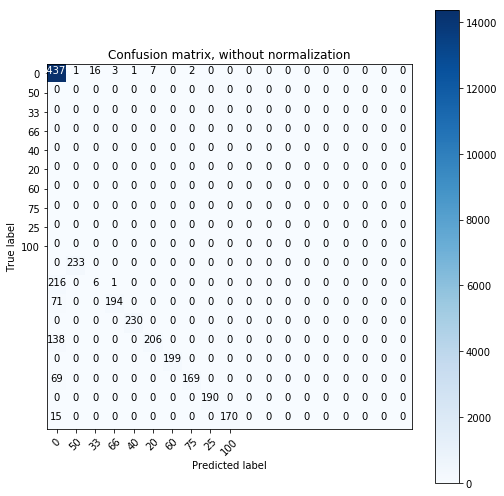

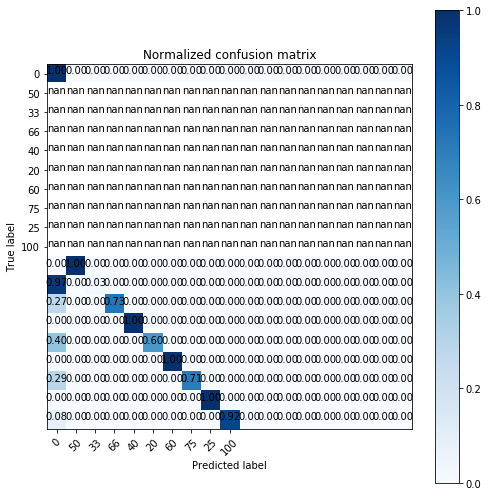

In [58]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [59]:
X_train.shape

(33532, 377)

In [60]:
y_train.shape

(33532,)

In [61]:
from time import time
t0 = time()

from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
# You can try passing X_enc to another classfier on top of gcForest.e.g. xgboost/RF.
X_test_enc = gc.transform(X_test)
X_train_enc = X_train_enc.reshape((X_train_enc.shape[0], -1))
X_test_enc = X_test_enc.reshape((X_test_enc.shape[0], -1))
X_train_origin = X_train.reshape((X_train.shape[0], -1))
X_test_origin = X_test.reshape((X_test.shape[0], -1))
X_train_enc = np.hstack((X_train_origin, X_train_enc))
X_test_enc = np.hstack((X_test_origin, X_test_enc))
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))
clf = RandomForestClassifier(n_estimators=1000, max_depth=None, n_jobs=-1)
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of Other classifier using gcforest's X_encode = {:.6f} %".format(acc * 100))  

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")


X_train_enc.shape=(33532, 417), X_test_enc.shape=(16516, 417)
Test Accuracy of Other classifier using gcforest's X_encode = 96.803100 %
('Compte fait en ', '399.147', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


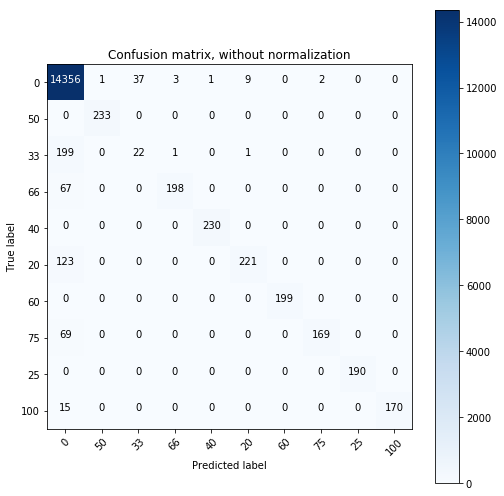

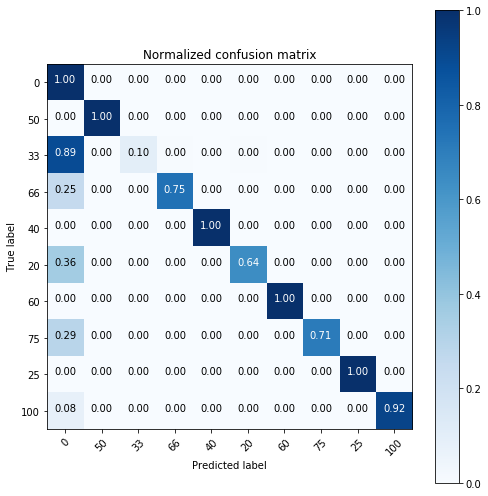

In [62]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [63]:
X_test_enc.shape

(16516, 417)

In [64]:
X_train_enc.shape

(33532, 417)

In [65]:
# You can try passing X_enc to another classfier on top of gcForest.e.g. xgboost/RF.
from time import time
t0 = time()

print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = RandomForestClassifier(n_estimators=1000, max_depth=None, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of RandomForestClassifier = {:.6f} %".format(acc * 100))   

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(33532, 377), X_test.shape=(16516, 377)
Test Accuracy of RandomForestClassifier = 96.924195 %
('Compte fait en ', '408.783', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


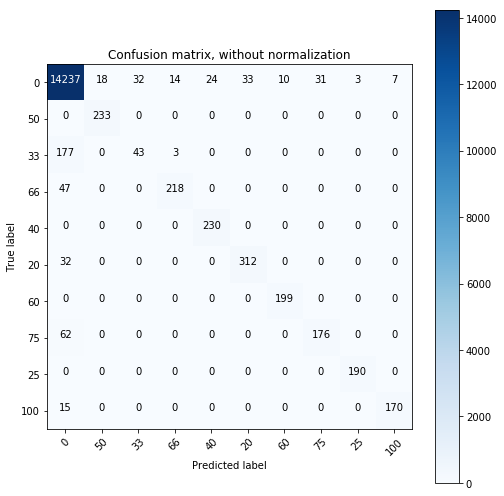

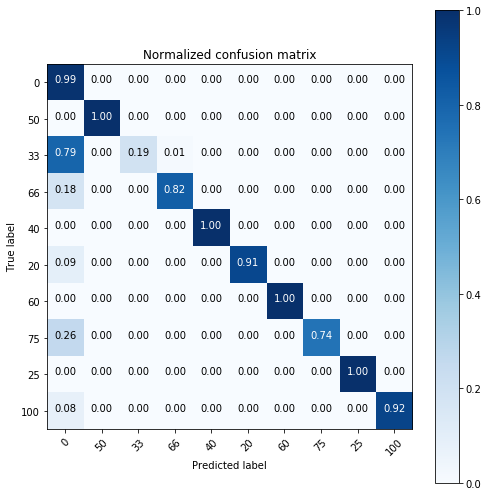

In [66]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [67]:
# You can try passing X_enc to another classfier on top of gcForest.e.g. xgboost/RF.
from time import time
t0 = time()

print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of LogisticRegression = {:.6f} %".format(acc * 100)) 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(33532, 377), X_test.shape=(16516, 377)
Test Accuracy of LogisticRegression = 87.127634 %
('Compte fait en ', '375.823', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


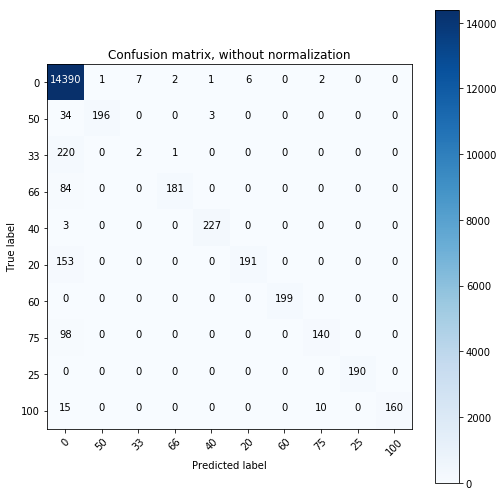

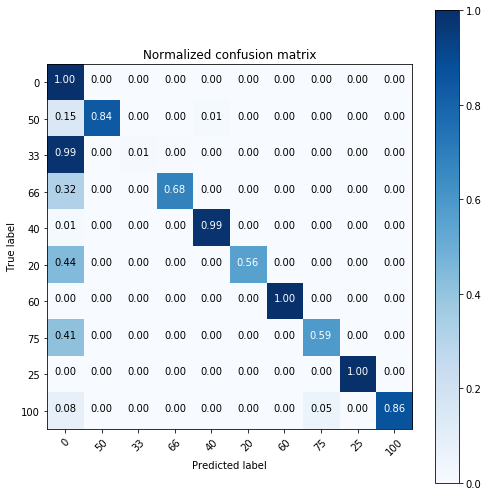

In [70]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [71]:
from time import time
t0 = time()

from sklearn import linear_model, datasets
from sklearn.linear_model import LogisticRegression
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))
clf = LogisticRegression()
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of LogisticRegression using gcforest's X_encode = {:.6f} %".format(acc * 100))  

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train_enc.shape=(33532, 417), X_test_enc.shape=(16516, 417)
Test Accuracy of LogisticRegression using gcforest's X_encode = 96.124970 %
('Compte fait en ', '376.181', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


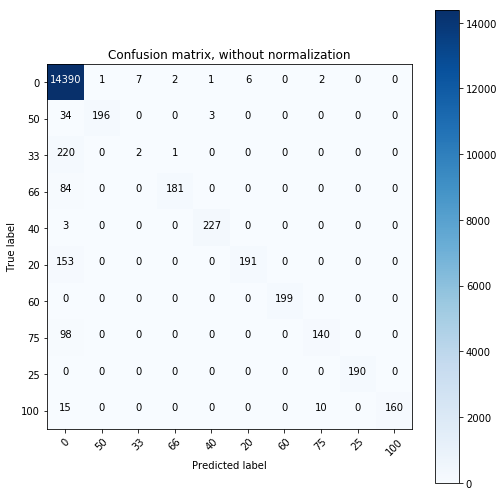

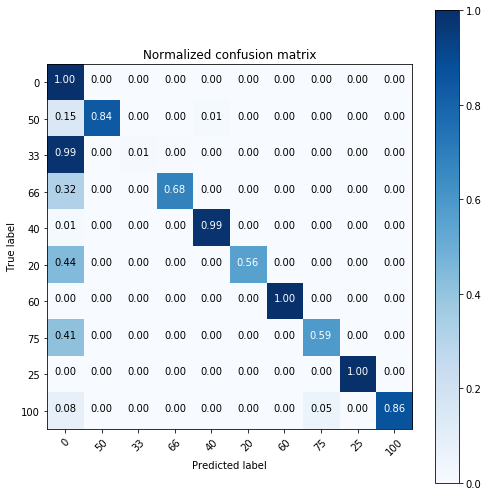

In [72]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [73]:
from time import time
t0 = time()

# You can try passing X_enc to another classfier on top of gcForest.e.g. xgboost/RF.
from xgboost import XGBClassifier
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of XGBClassifier = {:.6f} %".format(acc * 100)) 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(33532, 377), X_test.shape=(16516, 377)
Test Accuracy of XGBClassifier = 92.461855 %
('Compte fait en ', '989.262', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


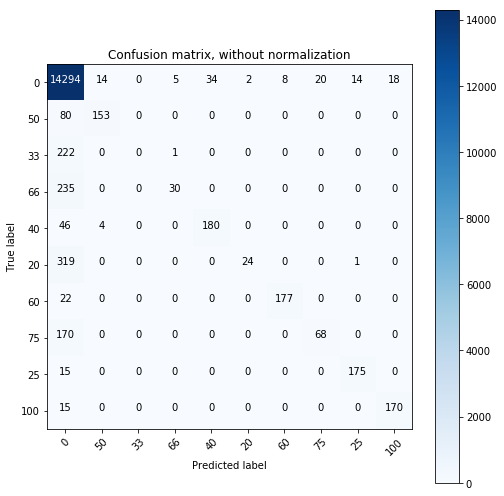

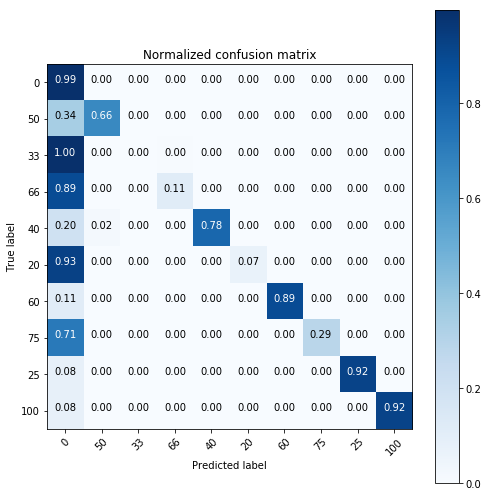

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [75]:
from time import time
t0 = time()

from xgboost import XGBClassifier
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))
clf = XGBClassifier()
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of XGBClassifier using gcforest's X_encode = {:.6f} %".format(acc * 100))  

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")


X_train_enc.shape=(33532, 417), X_test_enc.shape=(16516, 417)
Test Accuracy of XGBClassifier using gcforest's X_encode = 96.797045 %
('Compte fait en ', '976.269', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


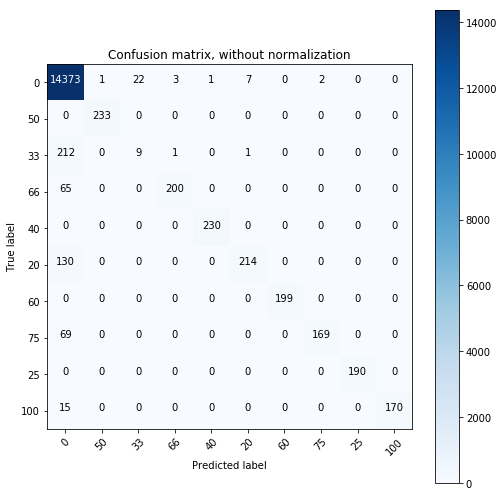

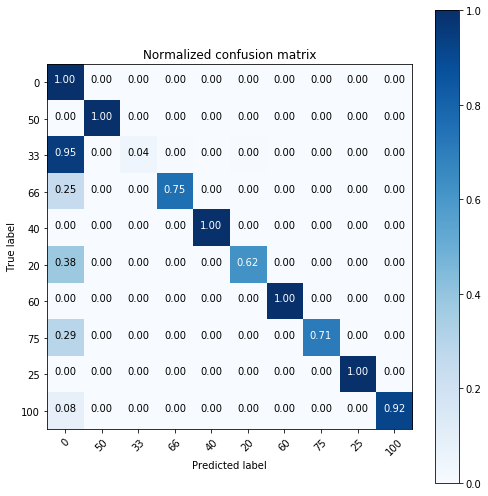

In [76]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [77]:
from time import time
t0 = time()

# You can try passing X_enc to another classfier on top of gcForest.e.g. xgboost/RF.
from sklearn.ensemble import ExtraTreesClassifier
print("X_train.shape={}, X_test.shape={}".format(X_train.shape, X_test.shape))
clf = ExtraTreesClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of ExtraTreesClassifier = {:.6f} %".format(acc * 100)) 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train.shape=(33532, 377), X_test.shape=(16516, 377)
Test Accuracy of ExtraTreesClassifier = 97.063454 %
('Compte fait en ', '1.594', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


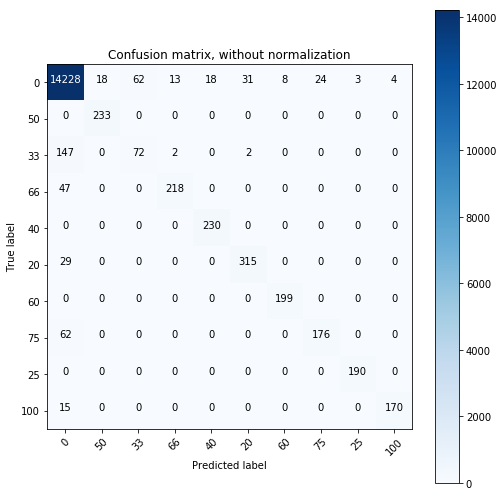

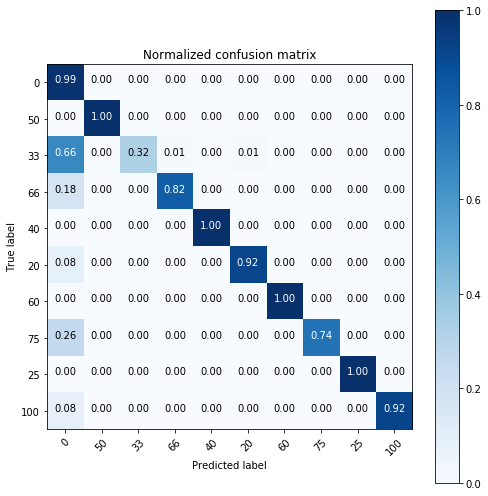

In [78]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [79]:
from time import time
t0 = time()

from sklearn.ensemble import ExtraTreesClassifier
print("X_train_enc.shape={}, X_test_enc.shape={}".format(X_train_enc.shape, X_test_enc.shape))
clf = ExtraTreesClassifier()
clf.fit(X_train_enc, y_train)
y_pred = clf.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy of ExtraTreesClassifier using gcforest's X_encode = {:.6f} %".format(acc * 100)) 

tt = time() - t0
print ("Compte fait en ",format(round(tt,3))," seconds")

X_train_enc.shape=(33532, 417), X_test_enc.shape=(16516, 417)
Test Accuracy of ExtraTreesClassifier using gcforest's X_encode = 96.730443 %
('Compte fait en ', '2.47', ' seconds')


Confusion matrix, without normalization
Normalized confusion matrix


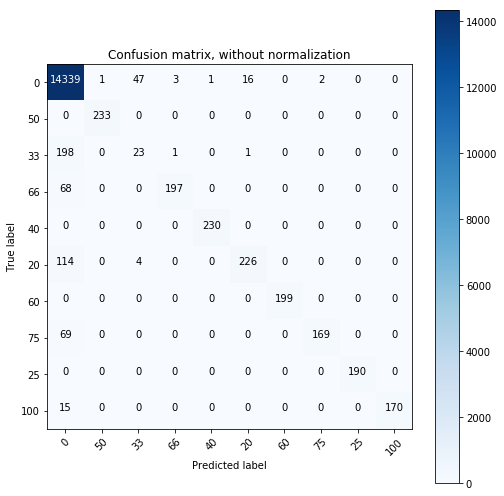

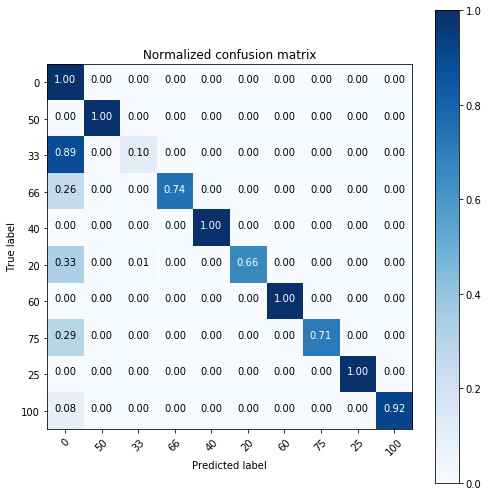

In [80]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(7, 7))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()